# Scraping Solar Panel Details of varies solar companies across the world.

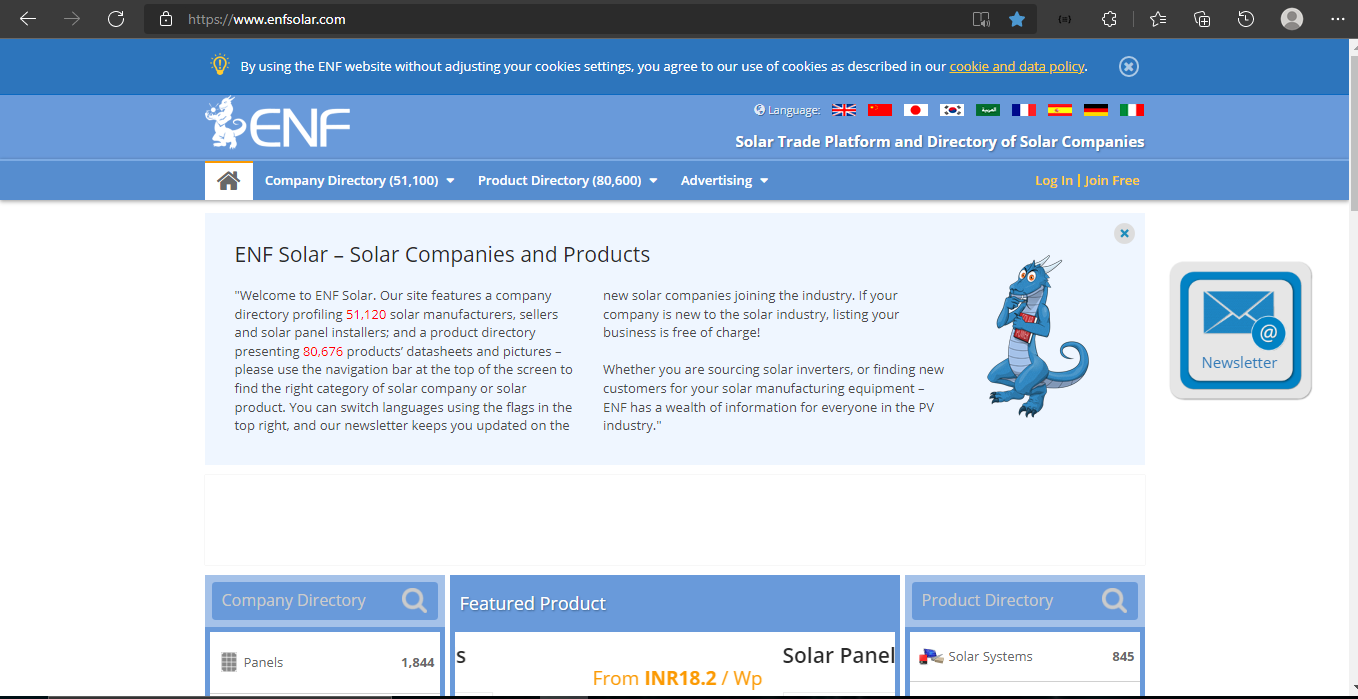

# Introduction 

### This project is about scraping solar panel details of the different companies from around the world. I have used a database from Europe for the project. The website name is https://www.enfsolar.com/ This website contains all the information about various products used in installing a mini solar power plant at house. I have attempted to collect only the information about solar panels listed in the site.

### I have decided to collect the following information about earch individual solar panel

1. Name of the product
2. Series Name
3. Price/Wp
4. Type
5. Power Range
6. Efficiency


## These are the steps that I have followed for the execution of this Project

1. Imorting the neccessary libraries
2. check wheather multiple pages can be accessed by the url definition or not
3. Use of simple while loop to get the required information
4. Using pandas create the dateframe
5. Check and convert the dataframe to csv file and at last
6. submit the project

# Step1: Importing the necessary libraries

### Here I have used Beautiful Soup Library to scrape the pages. The Beautiful Soup is a python library which is named after a Lewis Carroll poem of the same name in “Alice’s Adventures in the Wonderland”. Beautiful Soup is a python package and as the name suggests, parses the unwanted data and helps to organize and format the messy web data by fixing bad HTML and present to us in an easily-traversible XML structures. In short, Beautiful Soup is a python package which allows us to pull data out of HTML and XML documents.

### I have used requests to get the url response from the site https://www.enfsolar.com/ 

### Pandas is required to change the raw information in a clean data frame

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

# Step 2: check wheather multiple pages can be accessed by the url definition or not
Today I am trying to scrape a multiple pages, so I wanted to make sure all the pages can be accessed or not. In order to do that I just simply used a while with page numbers as a variable and printed out all the links

In [2]:
page = 1
while page != 620:
      url = f"https://www.enfsolar.com/pv/panel/{page}"
      print(url)
      page = page + 1

https://www.enfsolar.com/pv/panel/1
https://www.enfsolar.com/pv/panel/2
https://www.enfsolar.com/pv/panel/3
https://www.enfsolar.com/pv/panel/4
https://www.enfsolar.com/pv/panel/5
https://www.enfsolar.com/pv/panel/6
https://www.enfsolar.com/pv/panel/7
https://www.enfsolar.com/pv/panel/8
https://www.enfsolar.com/pv/panel/9
https://www.enfsolar.com/pv/panel/10
https://www.enfsolar.com/pv/panel/11
https://www.enfsolar.com/pv/panel/12
https://www.enfsolar.com/pv/panel/13
https://www.enfsolar.com/pv/panel/14
https://www.enfsolar.com/pv/panel/15
https://www.enfsolar.com/pv/panel/16
https://www.enfsolar.com/pv/panel/17
https://www.enfsolar.com/pv/panel/18
https://www.enfsolar.com/pv/panel/19
https://www.enfsolar.com/pv/panel/20
https://www.enfsolar.com/pv/panel/21
https://www.enfsolar.com/pv/panel/22
https://www.enfsolar.com/pv/panel/23
https://www.enfsolar.com/pv/panel/24
https://www.enfsolar.com/pv/panel/25
https://www.enfsolar.com/pv/panel/26
https://www.enfsolar.com/pv/panel/27
https://ww

# Step3: Use of simple while loop to get the required information
Here First used while to get the information about a single value from 10 pages which is series name of the solar panel. To do this I declared a list, using find_all() function I  brought the information by its class name. While loop is used to change the page number. Each time the loop executes, The information from the li tag is stored inside the list series name 

In [3]:
page = 1
series_names = []
while page != 10:
      url = f"https://www.enfsolar.com/pv/panel/{page}"
      response = requests.get(url)
      html = response.content
      soup = bs(html, "lxml")
      for li in soup.find_all('li',{'class':'enf-pd-list-main-li'}):
            series_names.append(li.get_text(strip=True))
      page = page + 1

I repeated the procedure to get multiple information from the site. Later on I appended all the lists to another List called panel_details.

In [4]:
page = 1
panel_details = []
while page != 620:
      url = f"https://www.enfsolar.com/pv/panel/{page}"
      response = requests.get(url)
      html = response.content
      soup = bs(html, "html")
      for i in soup.find_all('li',{'class':'enf-pd-list-main-li'}):
            panel_detail = {}
            panel_detail["name"] = i.find('div',{'enf-blue'}).get_text(strip=True)
            panel_detail["series_name"] = i.find('a',{'enf-product-name line-clamp-2'}).get_text(strip=True)
            panel_detail["product_type"]=i.find('td',{'enf-yellow'}).get_text(strip=True)
            panel_detail["panel_efficiency"]=i.find('td',{'enf-blue'}).get_text(strip=True)
            panel_detail["power_range"]=i.find('tr',{'enf-grey-back'}).find('td',{'enf-blue'}).get_text(strip=True)
                                             
            panel_details.append(panel_detail)
      page = page + 1

# Step4: Using pandas create the dateframe

By using pd.DataFrame() method, I created a table by passing the list panel_detailsand cheked it by printing and using head()

In [5]:
df=pd.DataFrame(panel_details)
print(df.head())

                      name                                        series_name  \
0              Linuo Power  Series:\n                                     ...   
1                ECO DELTA  Series:\n                                     ...   
2  München Energieprodukte  Series:\n                                     ...   
3            Runtech China  Series:\n                                     ...   
4                  Sunrise  Series:\n                                     ...   

      product_type panel_efficiency   power_range  
0  Monocrystalline  20.01 ~ 21.16 %  435 ~ 460 Wp  
1  Monocrystalline    20.8 ~ 21.3 %  390 ~ 400 Wp  
2  Monocrystalline    19.9 ~ 20.7 %  440 ~ 460 Wp  
3  Monocrystalline           14.7 %         50 Wp  
4             PERC  20.54 ~ 21.31 %  530 ~ 550 Wp  


In [6]:
df.head()

,name,series_name,product_type,panel_efficiency,power_range
0,Linuo Power,Series:\n ...,Monocrystalline,20.01 ~ 21.16 %,435 ~ 460 Wp
1,ECO DELTA,Series:\n ...,Monocrystalline,20.8 ~ 21.3 %,390 ~ 400 Wp
2,München Energieprodukte,Series:\n ...,Monocrystalline,19.9 ~ 20.7 %,440 ~ 460 Wp
3,Runtech China,Series:\n ...,Monocrystalline,14.7 %,50 Wp
4,Sunrise,Series:\n ...,PERC,20.54 ~ 21.31 %,530 ~ 550 Wp


In [7]:
df

,name,series_name,product_type,panel_efficiency,power_range
0,Linuo Power,Series:\n ...,Monocrystalline,20.01 ~ 21.16 %,435 ~ 460 Wp
1,ECO DELTA,Series:\n ...,Monocrystalline,20.8 ~ 21.3 %,390 ~ 400 Wp
2,München Energieprodukte,Series:\n ...,Monocrystalline,19.9 ~ 20.7 %,440 ~ 460 Wp
3,Runtech China,Series:\n ...,Monocrystalline,14.7 %,50 Wp
4,Sunrise,Series:\n ...,PERC,20.54 ~ 21.31 %,530 ~ 550 Wp
...,...,...,...,...,...
12375,Maysun Solar,Series:\n ...,PERC,9.37 ~ 20.37 %,380 ~ 410 Wp
12376,SZGD,Series:\n ...,Polycrystalline,12.6 %,55 Wp
12377,Aton Solar,Series:\n ...,PERC,20.49 %,400 Wp
12378,Guangzhou ESG New Energy Technology,Series:\n ...,Polycrystalline,--,120 Wp


In [8]:
df.shape

(12380, 5)

The DataFrame Contains 12380 rows and 5 columns

# Step 5: Check and convert the dataframe to csv file and at last
Since the data frame is clearly vissible in the above cell, Now Im converting the dataFrame to csv using to_csv() method

In [9]:
df.to_csv('Global_Solar_panel_data.csv')

# Step 6: submit the project

# Conclusion 

Here I have used https://www.enfsolar.com/ to collect the information about different companies solar panel details. The site also contains various other products. In future I will try to scrape other product details listed in the site.  

In [10]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit( project='Scraping Solar Panel Details of varies solar companies accross the world',file='Global_Solar_panel_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Creating a new project "reachto-smitha/Scraping Solar Panel Details of varies solar companies accross the world"
[jovian] Committed successfully! https://jovian.ai/reachto-smitha/scraping-solar-panel-details-of-varies-solar-companies-accross-the-world


'https://jovian.ai/reachto-smitha/scraping-solar-panel-details-of-varies-solar-companies-accross-the-world'